<a href="https://colab.research.google.com/github/kinderasteroid/Neural-Networks-Classification/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification

In [1]:
from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt


n_samp = 1000

X,y = make_circles(n_samp,noise=0.03,random_state=42)
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"Label":y})
circles






,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


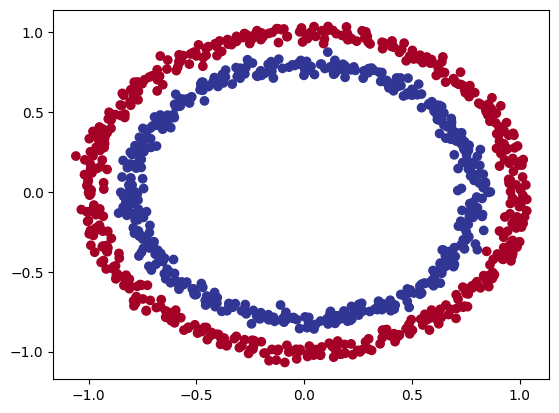

In [2]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [3]:
import tensorflow as tf
tf.random.set_seed(42)

model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])

#model.fit(tf.expand_dims(X,axis=-1),y,epochs=200)

In [4]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(1,activation="sigmoid")])

model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

history = model2.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 4ms/step - loss: 0.6907 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.5210
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5290
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5340
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5420
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.5320
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5480
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6850 - accuracy: 0.5540
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.5490
Epoch 10/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6840 - accuracy: 0.5380
Epoch 11/

In [5]:
model2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.3476 - accuracy: 0.9520


[0.34764954447746277, 0.9520000219345093]

#Replicate the Sigmoid Function


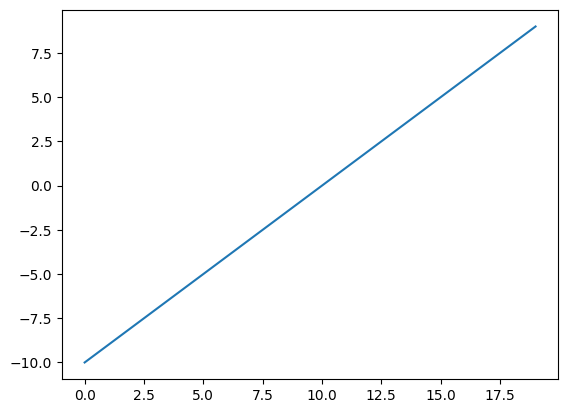

In [6]:

l= tf.cast(tf.range(-10,10),tf.float32)
plt.plot(l)

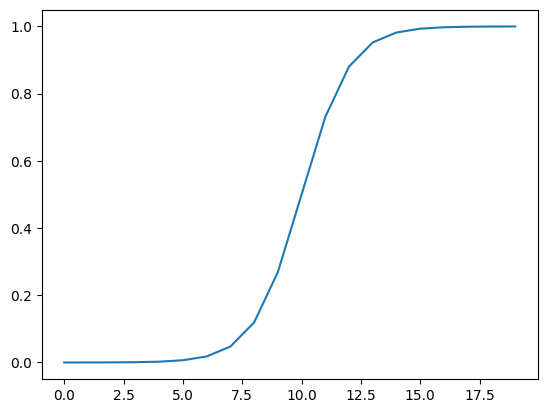

In [7]:
def sigmoid(X):
  return (1/(1+tf.math.exp(-X)))
da = tf.cast(tf.range(-10,10),tf.float32)
plt.plot(sigmoid(da))

In [8]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


#Replicate the Relu Function


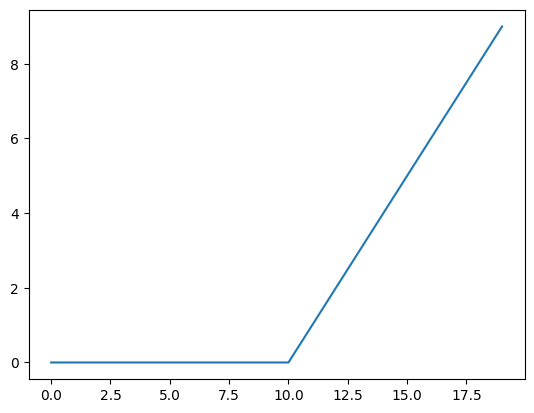

In [9]:

def relu(X):
    return(tf.maximum(X,0))
da = tf.cast(tf.range(-10,10),tf.float32)

plt.plot(relu(da))

#Evaluating the Model

<Axes: >

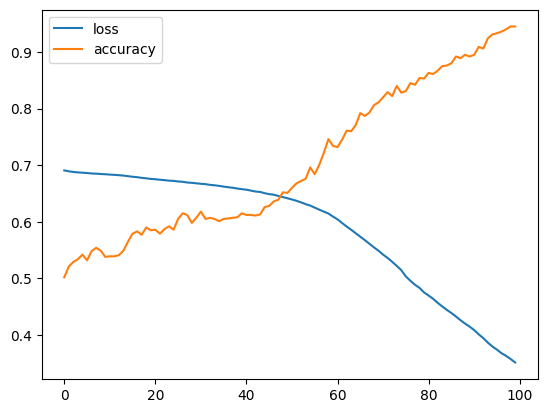

In [10]:
len(X)
pd.DataFrame(history.history).plot()

#Find the Best Learning Rate

In [11]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(1,activation="sigmoid")])

model4.compile(loss = tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.01),metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

history4 = model4.fit(X,y,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 0.7028 - accuracy: 0.5020 - lr: 1.0000e-04
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7021 - accuracy: 0.5020 - lr: 1.1220e-04
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7013 - accuracy: 0.4920 - lr: 1.2589e-04
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.4910 - lr: 1.4125e-04
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.4730 - lr: 1.5849e-04
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6991 - accuracy: 0.4990 - lr: 1.7783e-04
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.4980 - lr: 1.9953e-04
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6975 - accuracy: 0.4980 - lr: 2.2387e-04
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss:

#Plot the lr Rate against accuracy and Loss

<Axes: >

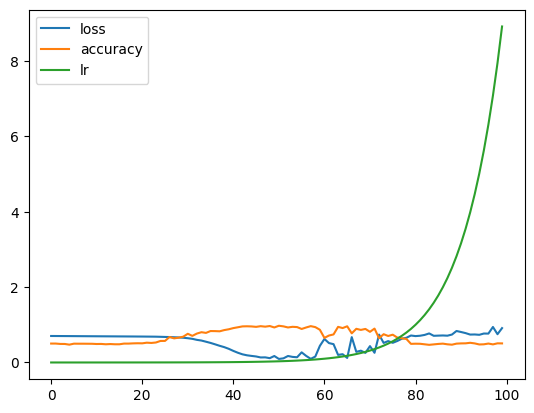

In [12]:
pd.DataFrame(history4.history).plot()

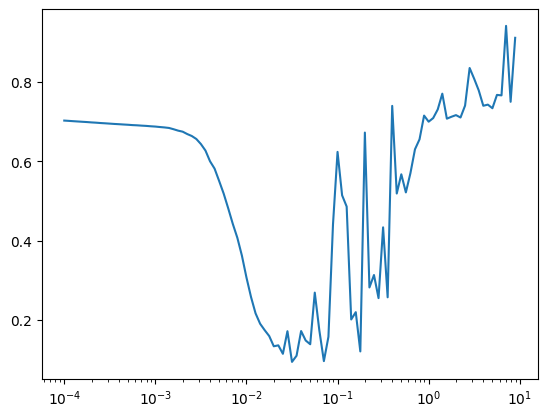

In [13]:
lrs = 1e-4*(10**(tf.range(100)/20))

plt.semilogx(lrs,history4.history['loss'])

#Train and Test Dataset


In [41]:
XTrain,ytrain = X[:800],y[:800]
XTest,ytest = X[800:],y[800:]
10**(-2)*3

0.03

#Decrease Epochs and Increase Learning Rate

In [45]:
tf.random.set_seed(42)

model5 = tf.keras.Sequential([tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(4,activation="relu"),tf.keras.layers.Dense(1,activation="sigmoid")])

model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),metrics=['accuracy'])

history5 = model5.fit(XTrain,ytrain,epochs=20)

Epoch 1/20
25/25 [==============================] - 3s 6ms/step - loss: 0.6987 - accuracy: 0.5050
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6818 - accuracy: 0.5600
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6591 - accuracy: 0.6150
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6637
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7738
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.8363
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3980 - accuracy: 0.8537
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.9087
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2500 - accuracy: 0.9650
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2014 - accuracy: 0.9725
Epoch 11/20
25/25 [

In [47]:
model5.evaluate(XTest,ytest)

7/7 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 1.0000


[0.034600984305143356, 1.0]

#Create Confusion Matrix

7/7 [==============================] - 0s 3ms/step


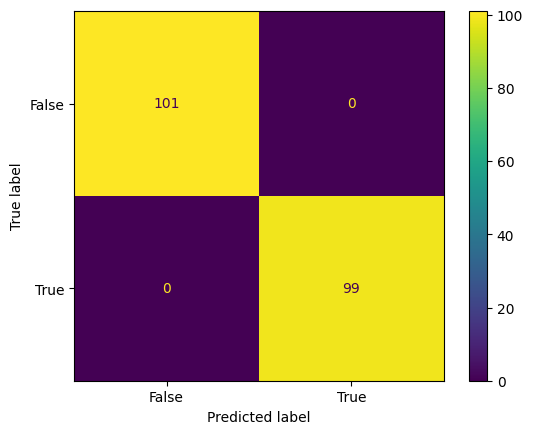

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
ypred = model5.predict(XTest)

cm = confusion_matrix(ytest,tf.round(ypred))


cmpp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True]).plot()
